In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
from PIL import Image
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:

for files in os.listdir("foodinput"):
    print(files)

churros
waffles
apple_pie


In [3]:
apple = r'foodinput/apple_pie/'
waffles = r'foodinput/waffles/'
churros = r'foodinput/churros/'

train_apple = os.listdir(apple)
train_waffle = os.listdir(waffles)
train_churro = os.listdir(churros)

In [4]:
cut = int(len(train_apple)*.80)

training_apple = train_apple[:cut]
testing_apple  = train_apple[cut:]

cut = int(len(train_waffle)*.80)
training_waffle= train_waffle[:cut]
testing_waffle = train_waffle[cut:]


In [5]:
print("training apple pi ", len(training_apple))
print("training waffle ", len(training_waffle))
print("testing apple ", len(testing_apple))
print("testing waffle ", len(testing_waffle))

training apple pi  800
training waffle  800
testing apple  200
testing waffle  200


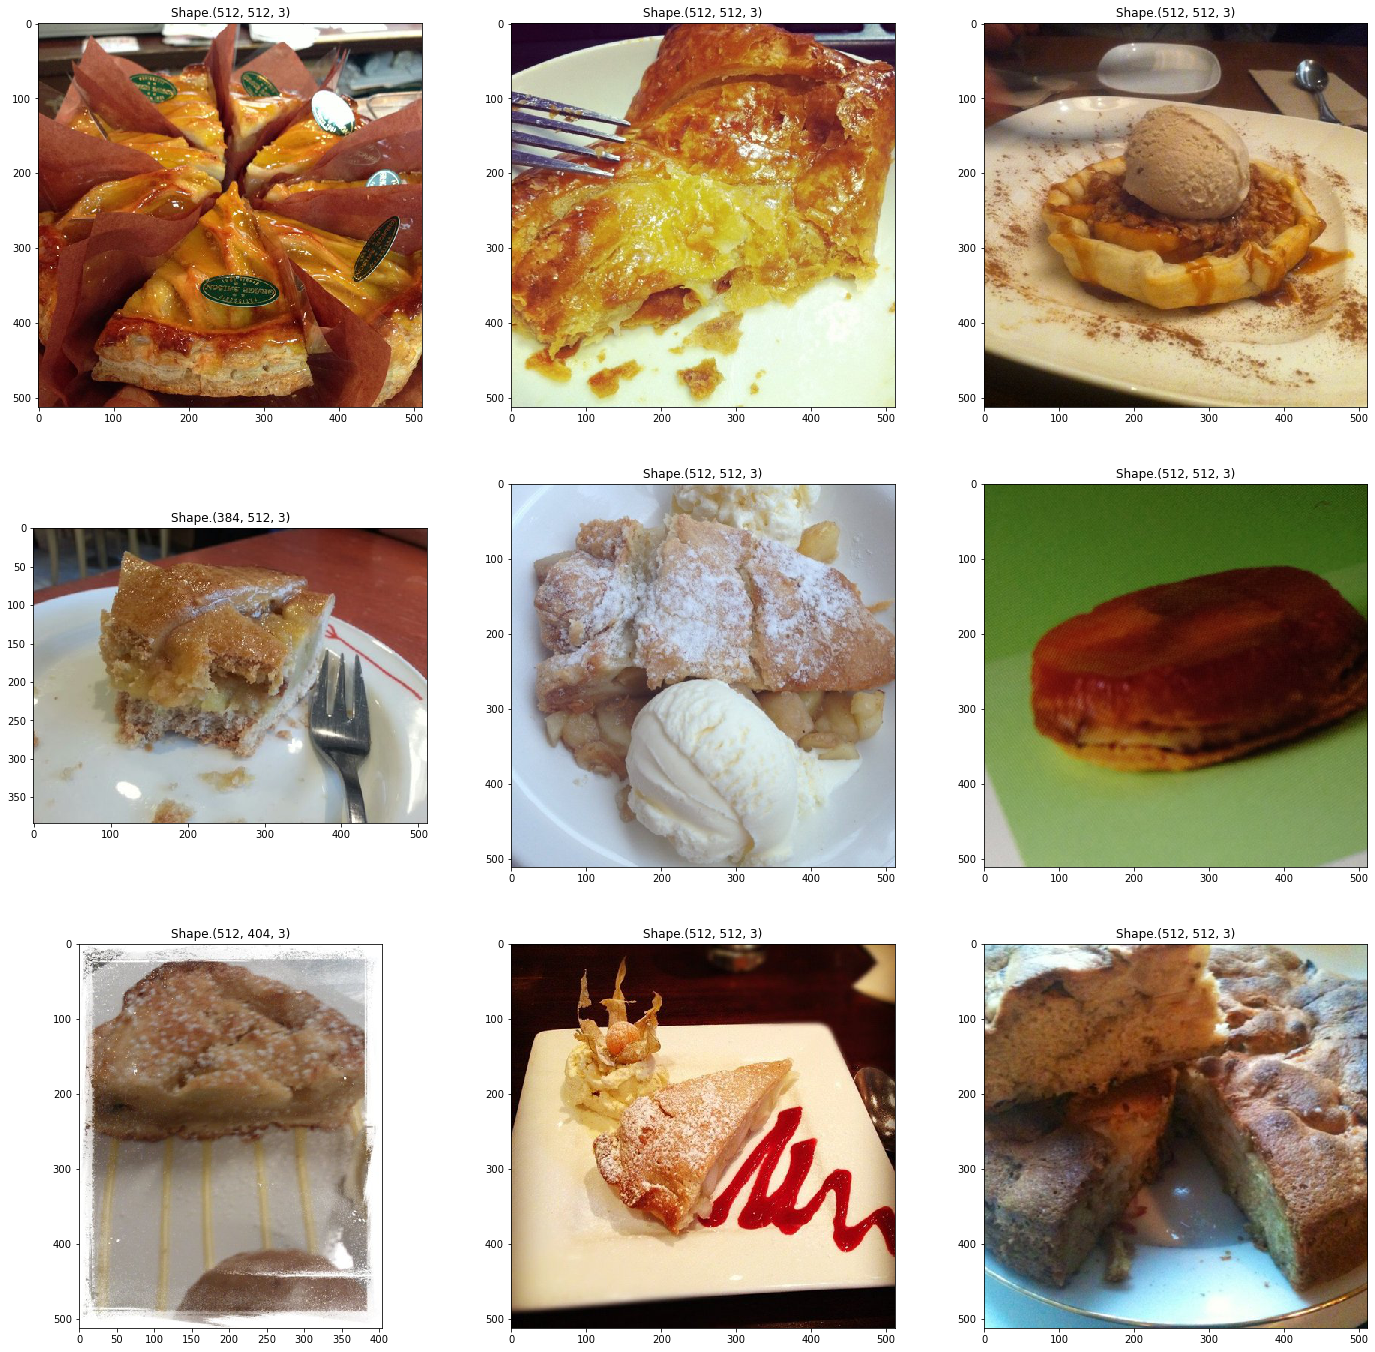

In [6]:
apple_fig, apple_axes = plt.subplots(3,3)
apple_fig.set_figheight(24)
apple_fig.set_figwidth(24)

for i, axis in enumerate(apple_axes):
    for j, f in enumerate(axis):
        img = plt.imread(apple+training_apple[i*3+j])
        apple_axes[i,j].imshow(img)
        apple_axes[i,j].set_title("Shape.{}".format(img.shape))

It can be seen that these images do not have the same shapes

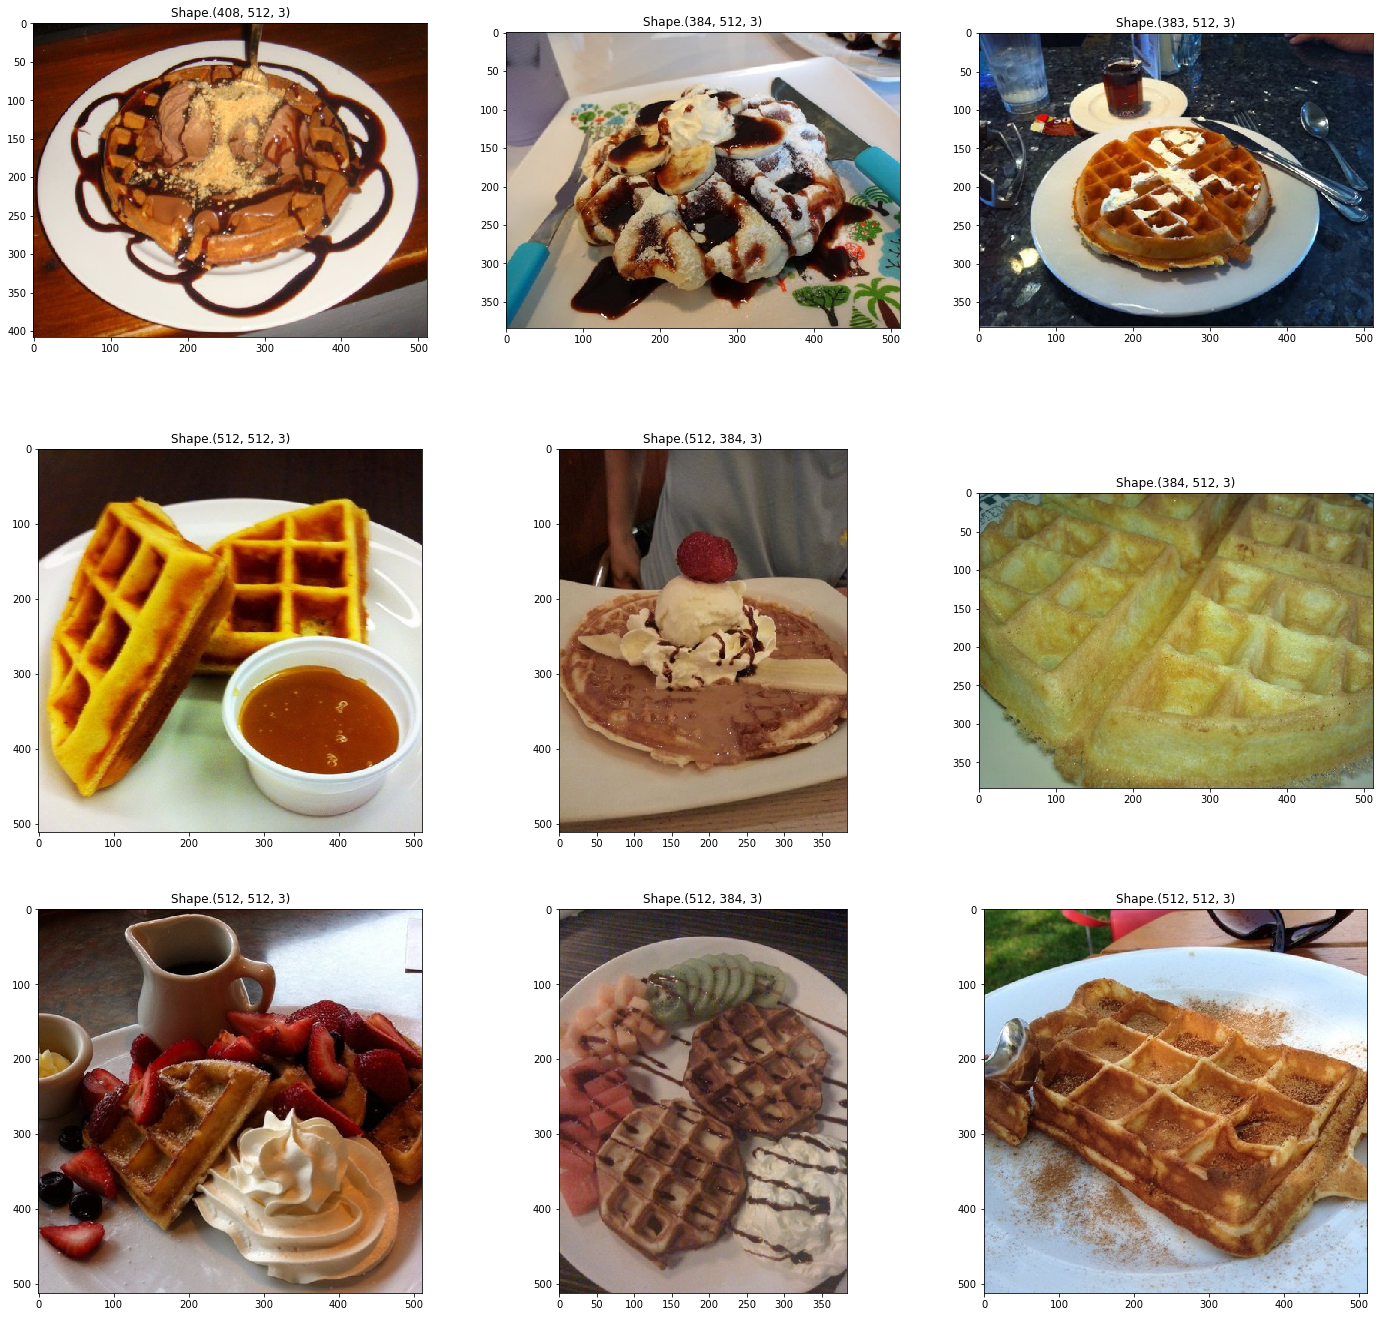

In [7]:
waffle_fig, waffle_axes = plt.subplots(3,3)
waffle_fig.set_figheight(24)
waffle_fig.set_figwidth(24)

for i, axis in enumerate(waffle_axes):
    for j, f in enumerate(axis):
        img = plt.imread(waffles+training_waffle[i*3+j])
        waffle_axes[i,j].imshow(img)
        waffle_axes[i,j].set_title("Shape.{}".format(img.shape))

In [8]:
input_shape = (224,224,3)
num_classes = 2

In [9]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.models import load_model
from keras.applications.mobilenet import MobileNet

In [10]:
mobilenet = MobileNet(input_shape, weights='imagenet', include_top=False)

In [11]:
model = Sequential()
model.add(mobilenet)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 7, 7, 1024)        3228864   
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               12845312  
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 514       
Total params: 16,074,690
Trainable params: 16,052,802
Non-trainable params: 21,888
_________________________________________________________________


Now we need to prepare the training and testing dataset, we assign dogs to class 0 and cats to class 1.

In [12]:
# resize from images 
img_resize = (224,224)
apple_train = []
waffle_train = []
apple_test = []
waffle_test = []
for apple_pie in training_apple:
    img = Image.open(apple + apple_pie)
    img = img.resize(img_resize)
    img = np.asarray(img)
    apple_train.append(img)
    
for waffle in training_waffle:
    img = Image.open(waffles + waffle)
    img = img.resize(img_resize)
    img = np.asarray(img)
    waffle_train.append(img)
    
for apple_pie in testing_apple:
    img = Image.open(apple + apple_pie)
    img = img.resize(img_resize)
    img = np.asarray(img)
    apple_test.append(img)
    
for waffle in testing_waffle:
    img = Image.open(waffles + waffle)
    img = img.resize(img_resize)
    img = np.asarray(img)
    waffle_test.append(img)


In [13]:
# image resize  

#plt.imshow(plt.imread(churros+churros_train[1]))

In [14]:
# adding label to the traing 
apple_train_label = [0 for _ in range(len(apple_train))]
waffle_train_label = [1 for _ in range(len(waffle_train))]
apple_test_label = [0 for _ in range(len(waffle_test))]
waffle_test_label = [1 for _ in range(len(waffle_test))]

In [15]:
apple_train_label.extend(waffle_train_label)
apple_test_label.extend(waffle_test_label)
label_train = np_utils.to_categorical(apple_train_label, num_classes)
label_test = np_utils.to_categorical(apple_test_label, num_classes)

In [16]:

#for train data
apple_train.extend(waffle_train)
data_train = np.array(apple_train, dtype=np.float32)
data_train /= 255
index = np.arange(len(data_train))
np.random.shuffle(index)
data_train = data_train[index]
label_train = label_train[index]

#for test data
apple_test.extend(waffle_test)
data_test = np.array(apple_test, dtype=np.float32)
data_test /= 255
index = np.arange(len(data_test))
np.random.shuffle(index)
data_test = data_test[index]
label_test = label_test[index]


In [17]:
data_train = np.squeeze(data_train)
data_test = np.squeeze(data_test)
label_train = np.squeeze(label_train)
label_test = np.squeeze(label_test)
print("Training label shape: ", label_train.shape)
print("Testing label shape: ", label_test.shape)
print("Training data shape: ", data_train.shape)
print("Testing data shape: ", data_test.shape)

Training label shape:  (1600, 2)
Testing label shape:  (400, 2)
Training data shape:  (1600, 224, 224, 3)
Testing data shape:  (400, 224, 224, 3)


Now start traning

In [ ]:
history = model.fit(data_train, label_train, validation_split=0.2, batch_size=4, epochs=10)

Train on 1280 samples, validate on 320 samples
Epoch 1/10
1280/1280 [==============================] - 217s 170ms/step - loss: 0.9376 - accuracy: 0.7336 - val_loss: 0.3226 - val_accuracy: 0.8625
Epoch 2/10
1280/1280 [==============================] - 188s 147ms/step - loss: 0.3201 - accuracy: 0.8516 - val_loss: 0.2836 - val_accuracy: 0.8781
Epoch 3/10
 156/1280 [==>...........................] - ETA: 2:26 - loss: 0.1911 - accuracy: 0.9103

In [ ]:
model.save("food_model.h5")

In [ ]:
# load model
###history = load_model('food_model.h5')
# summarize model.
####history.summary()

In [ ]:
history.history


In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Now we would like to see the performance of the model during training

In [ ]:
print(history.history.keys())


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
test_result = model.predict(data_test, batch_size=4)

In [ ]:
test_result[1]

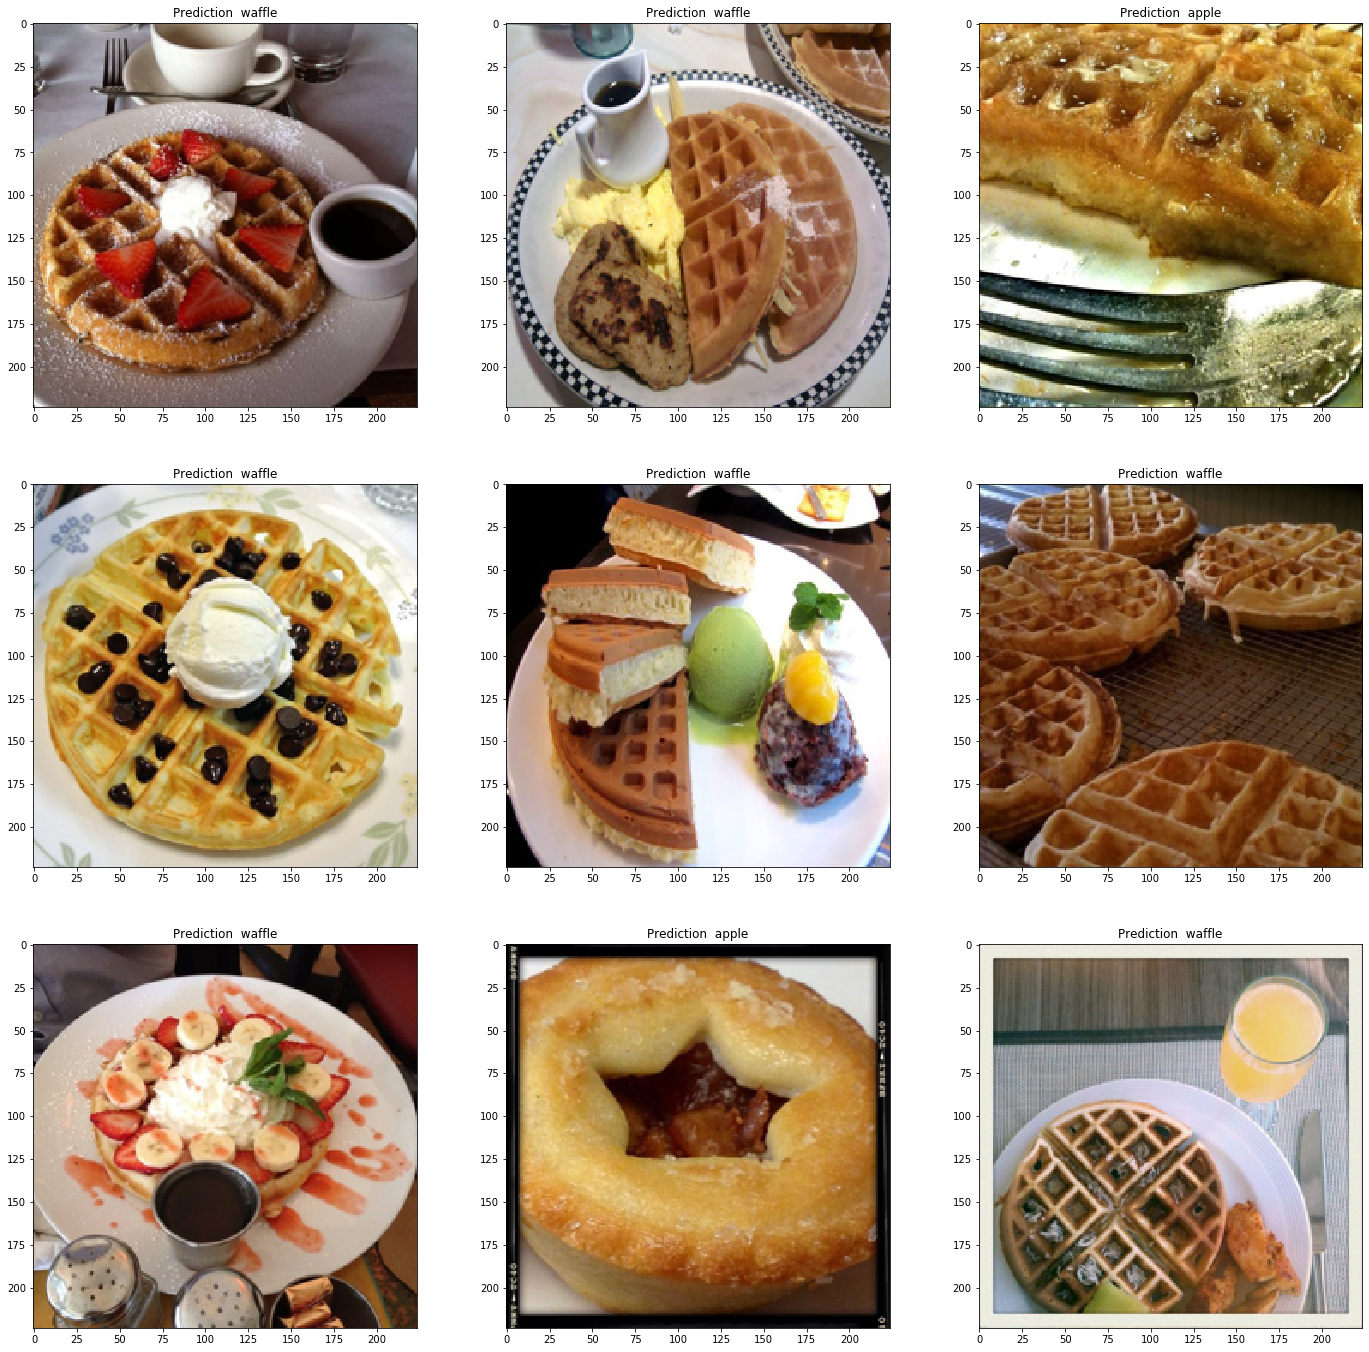

In [47]:
_fig, _axes = plt.subplots(3,3)

_fig.set_figheight(24)
_fig.set_figwidth(24)


for i in range(3):
    for j in range(3):
        img = data_test[i*3+j]
        _axes[i,j].imshow(img)
        if np.argmax(test_result[i*3+j]) == 0:
            _axes[i,j].set_title("Prediction  {}".format('apple'))
        else:
            _axes[i,j].set_title("Prediction  {}".format('waffle'))

Now let's plot some of the wrong classifications